# <div style="text-align:center;color:#FFF;background-color:#F03;height:130px"> <h1>Importing libraries</h1></div>

In [441]:
# Data treatment
import pandas as pd
import re
import pycountry
import fuzzywuzzy 

# Visualization
import seaborn as sns
import plotly.express as px

# <div style="text-align:center;color:#FFF;background-color:#F03;height:130px"> <h1>Exploration</h1></div>

### <div style="text-align: center"> <h2>Overview</h2></div>

In [401]:
df=pd.read_csv('dataset/df_job.csv', encoding = 'ISO-8859-1')
df.groupby('Job Type')['Job Type'].count()

Job Type
Full Time     3116
Internship      75
Part Time        6
Name: Job Type, dtype: int64

In [402]:
print(f'Rows: {df.shape[0]}\nColumns: {df.shape[1]}')

Rows: 3198
Columns: 8


In [403]:
df.dtypes

Company                       object
Job Title                     object
Location                      object
Job Type                      object
Experience level              object
Salary                        object
Requirment of the company     object
Facilities                    object
dtype: object

<div style="background-color:#432D;">
<h4>Data field Job Salaries Dataset has <mark>8 columns</mark>, each are:</h4><ul>
<li><b> <mark>1. Company</mark></b>: The name of company.</li>
<li><b> <mark>2. Job Title</mark></b>: The role work.</li>
<li><b> <mark>3. Location</mark></b>: Employee's primary country of residence with option remote.</li>
<li><b> <mark>4. Job Type</mark></b>: The type of employment for the role</li>
<li><b> <mark>5. Experience level</mark></b>: The experience level in the job</li>
<li><b> <mark>6. Salary</mark></b>: offerd salary for this work role</li>
<li><b> <mark>7. Requirment of the company</mark></b>: The skills that company want.</li>
<li><b> <mark>8. Facilities</mark></b>: The flexibility of job.</li>
</ul>
</div>

In [404]:
df.isnull().sum()

Company                         1
Job Title                       1
Location                        1
Job Type                        1
Experience level              236
Salary                        189
Requirment of the company       0
Facilities                      0
dtype: int64

In [405]:
df.nunique()

Company                       1106
Job Title                     2138
Location                      1117
Job Type                         3
Experience level                 4
Salary                         218
Requirment of the company     2600
Facilities                     777
dtype: int64

In [406]:
df.duplicated().sum()

202

In [407]:
df.head().style.set_properties(**{'background-color': '#00b4','color': 'white','border-color': '#8b8c8c'}).highlight_null(color="red")

,Company,Job Title,Location,Job Type,Experience level,Salary,Requirment of the company,Facilities
0,SGS,Clinical Data Analyst,"Richardson, TX, United States",Full Time,Entry-level,48K+ *,"Computer Science,Data quality,Genetics,Mathematics,SAS,Statistics",",,,,"
1,Ocorian,AML/CFT & Data Analyst,"Ebène, Mauritius",Full Time,Entry-level,48K+ *,"Agile,Data management,Finance,Security,,",",,,,"
2,Cricut,Machine Learning Engineer,"South Jordan, UT, United States",Full Time,nan,90K+ *,"Agile,Architecture,AWS,Computer Science,Computer Vision,Deep Learning","Career development,,,,"
3,Bosch Group,Application Developer & Data Analyst,"Nonantola, Italy",Full Time,Entry-level,48K+ *,"Engineering,Industrial,Oracle,Power BI,R,R&D",",,,,"
4,Publicis Groupe,Data Engineer Full time (Public Sector) USA,"Arlington, VA, United States",Full Time,Mid-level,108K+,"AWS,Azure,Computer Science,Consulting,Dataflow,Data pipelines","Flex hours,Flex vacation,Parental leave,Unlimited paid time off,"


In [408]:
df.tail().style.set_properties(**{'background-color': '#00b9','color': 'white','border-color': '#8b8c8c'},highlight_null="red").highlight_null(color="red")

,Company,Job Title,Location,Job Type,Experience level,Salary,Requirment of the company,Facilities
3193,Western Digital,Data Scientist - New College Graduate,"Biñan, Philippines",Full Time,Entry-level,39K+ *,"APIs,Clustering,Computer Science,Data visualization,Deep Learning,Docker","Career development,,,,"
3194,Experian,Cloud Data Analyst,"Heredia, Costa Rica",Full Time,Senior-level,92K+ *,"AWS,Big Data,Computer Science,GCP,Snowflake,SQL","Equity,Medical leave,Salary bonus,,"
3195,Locus Robotics,"Robotics Engineer, Sensors","Wilmington, MA, United States",Full Time,Senior-level,62K+ *,"E-commerce,Engineering,Linux,Python,Robotics,Statistics",",,,,"
3196,ATB Financial,Data Scientist,"Edmonton, Alberta, Canada",Full Time,Entry-level,39K+ *,"Computer Science,Data Analytics,Data Mining,Economics,Engineering,GCP","Career development,Startup environment,,,"
3197,Shippeo,Senior Data Engineer,"Paris, France",Full Time,Senior-level,115K+ *,"Airflow,Architecture,BigQuery,CI/CD,Computer Science,Data pipelines",",,,,"


# <div style="text-align:center;color:#FFF;background-color:#F03;height:120px"> <h1>Cleaning</h1></div>

In [409]:
df.loc[df['Job Type'] == 'Internship', 'Salary'] = 0


# Covert salary Dataype to int
def salary_corr(txt):
    if str(txt).find('K')!=-1:
        return int(re.findall(r'\d+', txt)[0])*1000
    else:
        return txt
        

df['Salary']=df['Salary'].apply(salary_corr)

In [410]:
# Drop duplicates
df.drop_duplicates(inplace=True)

In [411]:
# Find the country name from location
def detect_country_name(location_name):
    location_name=str(location_name).upper()
    if 'REMOTE' in location_name:
        return 'REMOTE' 
    else:
        country=location_name.split(',')[-1]
        try:
            country=pycountry.countries.search_fuzzy(country)[0].name
        except:
            pass
        return country

df['Location']=df['Location'].apply(detect_country_name)

In [412]:
# Fix the 'Requirment of the company ' column
def remove_trailing_commas(input_string):
    if isinstance(input_string,str):
        while input_string.endswith(","):
            input_string = input_string[:-1]
    return input_string


df['Requirment of the company ']=df['Requirment of the company '].apply(remove_trailing_commas)

In [413]:
# Replace the null value in the Experience by 'All-Level' because the company accepet all levels
df['Experience level'].fillna('Not-Specified',inplace=True)

In [414]:
# Drop the 'Facilities' columns
df.drop(columns=['Facilities'],inplace=True)
# Drop the lines thath containt null values because it's come probably from entries errors
df.dropna(inplace=True)

### clean the job title coulmn

In [415]:
data_scientist_job_titles = [
    "BI Developer",
    "Data Manager",
    "Data Modeler",
    "MLOps Engineer",
    "artificielle intelligence",
    "AI Engineer",
    "Data Scientist",
    "Data Analyst",
    "Business Analyst",
    "Vice President",
    "Project Coordinator",
    "Director - Advanced Analytics",
    "Data Ops",
    "Business Intelligence",
    "Chief Analytic Officer",
    "Data Learning Engineer",
    "Chief Analytic Officer",
    "Director of Risk Analytics and Policy",
    "GIS Analyst",
    "Data Visualizers",
    "Chief Technology Officer",
    "Health Analytics",
    "Director Marketing Analytics",
    "Big Data",
    "Data Developer",
    "Clinical Analytics",
    "Big Data Architect",
    "Python Engineer",
    "Data Journalist",
    "Chief Strategy & Analytics Officer",
    "Customer Analytics & Pricing",
    "Data Visualization Analyst",
    "Research Analyst",
    "Senior VP",
    "Chief Analytics & Algorithms Officer",
    "Data Architect",
    "Statistician",
    "AI Product Manager",
    "Information Security Analyst",
    "Research Analyst",
    "Quantitative Developer",
    "Statistical Modeling and Analytics",
    "Principal Big Data Architect",
    "Customer Analytics",
    "Web Analytics",
    "Risk and Business Analytics",
    "Machine Learning Engineer",
    "data Researcher",
    "Health Data Analyst",
    "Data Engineer",
    "Database Administrator",
    "Strategic Data Analytics Analyst",
    "Data and Analytics Manager",
    "AI Architect",
    "Data Manager",
    "Business Intelligence"
    "Director, Database Marketing & Analytics",
    "Director of Analytics",
    "Database Administrator",
    "Python Data Developer"
]


In [416]:
def find_job_title(text):
    best_matched_title=None
    best_matched_score=0
    for job_title in data_scientist_job_titles:
        score=fuzzywuzzy.fuzz.WRatio(text,job_title)
        if score>best_matched_score:
            best_matched_score=score
            best_matched_title=job_title
    if best_matched_score>=90:
        return best_matched_title
    else:
        return text

df['Job Title']=df['Job Title'].apply(find_job_title)

<Axes: >

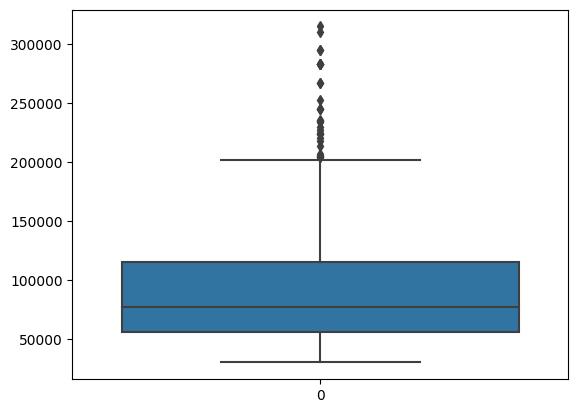

In [417]:
sns.boxplot(data=df[df['Salary']>0]['Salary'])
# I will not drop the outlier because the results will change also the data correctly entered and measured data.

In [418]:
df.reset_index()
df.to_csv('cleaned.csv')

# <div style="text-align:center;color:#FFF;background-color:#F03;height:120px"> <h1>Visualization & Analysis</h1></div>

In [419]:
df=pd.read_csv('cleaned.csv')
df.drop(columns=['Unnamed: 0'],inplace=True)

### <div style="text-align:center"> <h1>Univarient Analysis</h1></div>

In [464]:
fig=px.bar(data_frame=pd.DataFrame(df['Job Title'].value_counts().nlargest(5)),template='plotly_dark')
fig.show()

In [423]:
level_counts=df['Experience level'].value_counts()
fig=px.pie(values=level_counts.values,
          names=level_counts.index,
          color_discrete_sequence=px.colors.sequential.Mint,
          title= 'Experience level distribution',template='plotly_dark'
          )
fig.update_traces(textinfo='label+percent+value', textfont_size=13,
                  marker=dict(line=dict(color='#100000', width=0.2)))

fig.data[0].marker.line.width = 2
fig.data[0].marker.line.color='gray'
fig.show()

['Data Engineer',
 'Data Analyst',
 'Data Scientist',
 'Machine Learning Engineer',
 'Business Intelligence']

In [ ]:
px.scatter(df[df['Job Title'] in list(df['Job Title'].value_counts().nlargest(5).keys())], x = 'Salary', y = 'Experience level', size = 'Salary', hover_name = 'Job Title', color = 'Job Title', 
           color_discrete_sequence=px.colors.qualitative.Alphabet, template = 'plotly_dark', 
           title = 'Experience level BY Salary').update_yaxes(categoryarray = ['Entry-level', 'Not-Specified', 'Mid-level', 'Senior-level',
       'Executive-level'])